AUC: 0.90


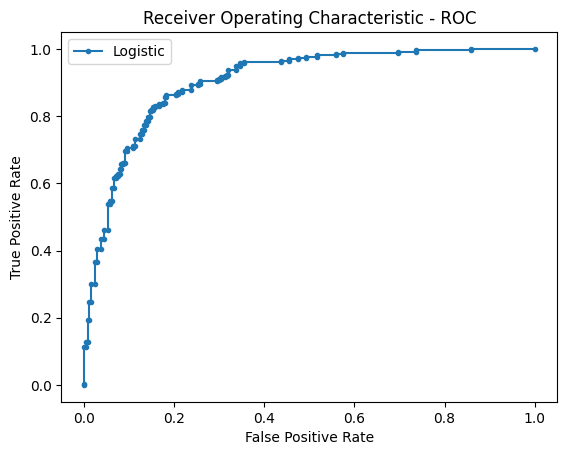

In [2]:
# First, let's import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# We will generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Splitting our data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# We will use Logistic Regression as a simple classifier
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Keep probabilities of the positive class only
y_pred_prob = y_pred_prob[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.2f' % auc)

# Plotting the ROC curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend()
plt.show()
